<a href="https://colab.research.google.com/github/Hawawou/UE-803/blob/main/Clustering_justTexts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df1 = pd.read_csv('/content/biography_cs.csv')
df2 = pd.read_csv('/content/biography_sculptor.csv')
df = pd.concat([df1, df2])
df.head()
df.tail()

,Category,Name,Content
92,Sculptors,Mary Audsley,Mary C. Audsley (1919-2008) was a British pain...
93,Sculptors,Hezekiah Augur,"Hezekiah Augur (February 21, 1791 – January 10..."
94,Sculptors,Antun Augustinčić,Antun Augustinčić (4 May 1900 – 10 May 1979) w...
95,Sculptors,Alice Aycock,"Alice Aycock (born November 20, 1946) is an Am..."
96,Sculptors,Giovanni Bernardino Azzolini,Giovanni Bernardino Azzolini (c. 1572 – 12 Dec...


# Vectorise the texts


In [3]:
X = df['Content']
Y = df['Category']
X.head()

0    Atta ur Rehman Khan (Urdu: عطا الرحمن خان) is ...
1    Willibrordus Martinus Pancratius van der Aalst...
2    Scott Joel Aaronson (born May 21, 1981) is an ...
3    Rediet Abebe (Amharic: ረድኤት አበበ) is an Ethiopi...
4    Harold Abelson (born April 26, 1947) is an Ame...
Name: Content, dtype: object

In [4]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [6]:
!pip install nltk

In [9]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# Using TFIDF vectorizer to convert convert words to Vector Space
tfidf_vectorizer = TfidfVectorizer(max_features=500,
                                       use_idf=True,
                                       stop_words='english',
                                       tokenizer=nltk.word_tokenize,
                                       ngram_range=(1, 1))

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(X)

In [12]:
features = tfidf_vectorizer.get_feature_names_out()
print(features)

['$' '&' "'" "''" "'s" '(' ')' ',' '-' '.' '...' '1' '10' '1973' '1980'
 '1982' '1985' '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993'
 '1994' '1995' '1996' '1997' '1998' '1999' '2' '20' '2000' '2001' '2002'
 '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012'
 '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022'
 '2023' '3' '4' '5' '8' ':' ';' '==' '===' '====' '[' ']' '``' 'a.'
 'academic' 'academy' 'according' 'achievement' 'acm' 'ada' 'advanced'
 'age' 'ai' 'alan' 'algol' 'algorithm' 'algorithms' 'american' 'analysis'
 'apple' 'application' 'applications' 'applied' 'approach' 'april'
 'architecture' 'archived' 'area' 'art' 'article' 'articles' 'artificial'
 'artist' 'arts' 'assistant' 'associate' 'association' 'attended' 'august'
 'author' 'award' 'awarded' 'awards' 'babbage' 'bachelor' 'based' 'basic'
 'began' 'bell' 'berkeley' 'best' 'bezos' 'biography' 'board' 'book'
 'books' 'born' 'botvinnik' 'british' 'building' 'built' 'business' 'c

# K-means clustering

In [13]:
from sklearn.cluster import KMeans

# Kmeans++
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=5, verbose=0, random_state=3425)
km.fit(tfidf_matrix)
# cluster assignement (list showing the cluster assigned to each instance)
predicted_labels = km.labels_
clusters = predicted_labels.tolist()

In [14]:
print(predicted_labels)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

## Inspecting Clustering Results

In [18]:
df['cluster'] = clusters
df['cluster'].value_counts()

cluster
0    702
1     41
Name: count, dtype: int64

In [22]:
from sklearn import metrics
# Convert  labels to numerical values if necessary
labels = df['Category'].astype('category').cat.codes
#labels= df['Category']
print( labels)
print( km.labels_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(tfidf_matrix, km.labels_, sample_size=1000))

print()

0     0
1     0
2     0
3     0
4     0
     ..
92    1
93    1
94    1
95    1
96    1
Length: 743, dtype: int8
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0

 **Supervised metrics **show that the automatic clustering is very different from the ground truth. Homogeneity should be close to 1 if each cluster contained only members of a
single class. Completness should be close to 1 if all members of a class are assigned to the
same cluster. Adjusted Rand-Index is negative.

Unsupervised metrics: Silhouette Coefficient is small, showing that the data was not apropriately clusterd with only two clusters.

# Visualisation of the clusters

In [26]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [23]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array

MDS()

# n_components=2 to plot results in a two-dimensional plane
# "precomputed" because the  distance matrix dist is already computed
# `random_state` set to 1 so that the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [33]:
#set up colors per clusters using a dict
# #1b9e77 (green) #d95f02 (orange) #7570b3 (purple) #e7298a (pink)
cluster_colors = {0: '#7570b3', 1: '#1b9e77'}

#set up cluster names using a dict
#cluster_names = {0: 'techno'}

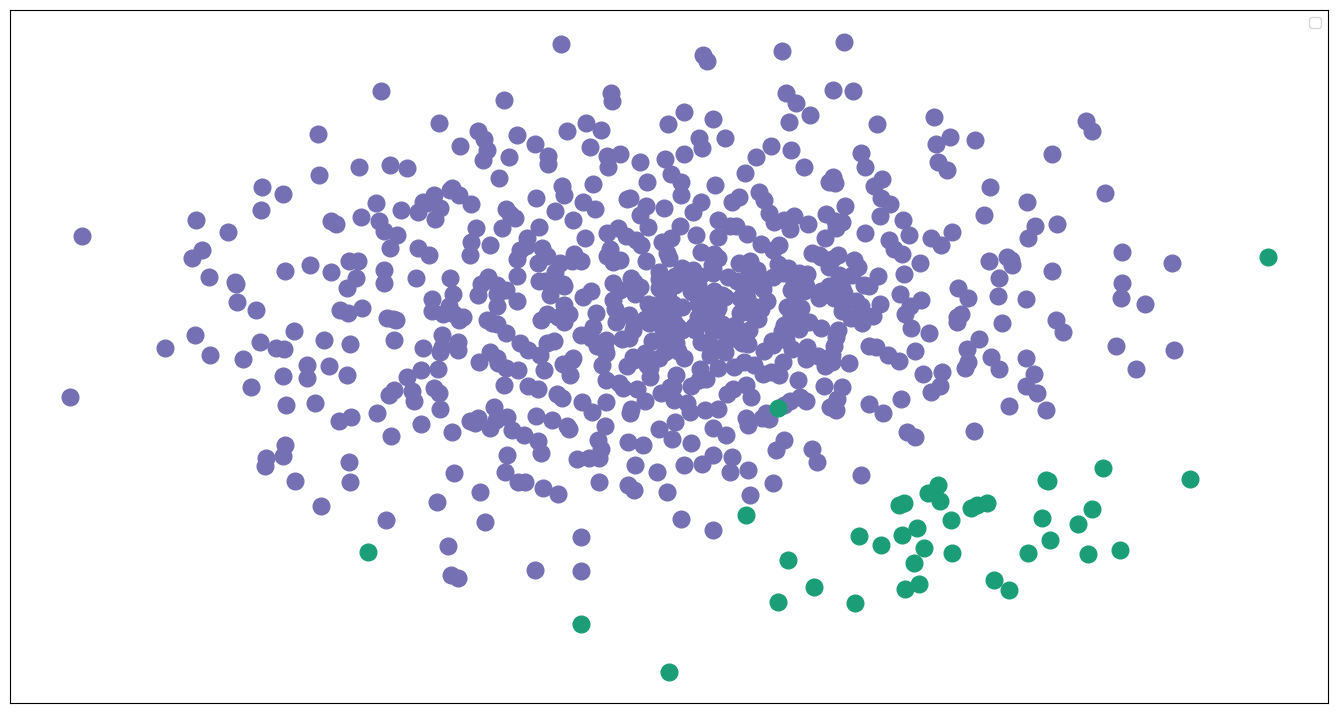

In [34]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
        #    label=cluster_names[name],
            color=cluster_colors[name])
        #    mec='non')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False)

ax.legend(numpoints=1)  #show legend with only 1 point


plt.show() #show the plot
